#### 1 Importing the required Lybraries

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

#### 2 Data Importing process
######   Merging all the excel files as on csv using the Symbol column to join the data after   importing each excel file to my working folder

In [ ]:
# Listing the files to be merged
file_paths = [
    'Coffee-2012.xlsx',
    'Coffee-2013.xlsx',
    'Coffee-2014.xlsx',
    'Coffee-2015.xlsx',
    'Coffee-2016.xlsx',
    'Coffee-2017.xlsx',
    'Coffee-2018.xlsx',
    'Coffee-2019.xlsx']

# Reading and merging the files
dfs = [pd.read_excel(file) for file in file_paths]

merged_df = pd.concat(dfs, ignore_index=True)

# Saving the merged DataFrame to a CSV file
merged_df.to_csv('ethiopian_coffee_exchange_data.csv', index=False)

print("Data merged and saved to 'ethiopian_coffee_exchange_data.csv'.")

In [3]:
df = pd.read_csv('ethiopian_coffee_exchange_data.csv')
df.head()

,Trade Date,Symbol,Warehouse,Production Year,Opening Price,Closing Price,High,Low,Change,Persetntage Change,Volume (Ton)
0,2012-01-02,WYKQ2,BG,2004,"1,175.00",0.00,"1,175.00","1,175.00",0,0.0,28.29
1,2012-01-03,WYKQ2,BG,2004,"1,175.00",0.00,"1,175.00","1,175.00",0,0.0,10.80
2,2012-01-04,WYKQ2,BG,2004,"1,180.00",0.00,"1,180.00","1,180.00",0,0.0,6.61
3,2012-01-06,WYKQ2,BG,2004,"1,175.00",0.00,"1,175.00","1,175.00",0,0.0,8.99
4,2012-01-12,WYKQ2,BG,2004,"1,293.00",0.00,"1,293.00","1,280.00",0,0.0,18.00


In [4]:
df.describe()

,Production Year,Change,Volume (Ton)
count,91423.000000,91423.000000,91423.000000
mean,2007.398106,24.979907,22.745432
std,2.366144,58.014626,29.990070
min,2002.000000,0.000000,1.800000
25%,2005.000000,0.000000,6.830000
50%,2007.000000,10.000000,12.750000
75%,2009.000000,29.000000,25.500000
max,2011.000000,2230.000000,596.700000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91423 entries, 0 to 91422
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trade Date          91423 non-null  object 
 1   Symbol              91423 non-null  object 
 2   Warehouse           91423 non-null  object 
 3   Production Year     91423 non-null  int64  
 4   Opening Price       91423 non-null  object 
 5   Closing Price       91423 non-null  object 
 6   High                91423 non-null  object 
 7   Low                 91423 non-null  object 
 8   Change              91423 non-null  int64  
 9   Persetntage Change  91423 non-null  object 
 10  Volume (Ton)        91423 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 7.7+ MB


#### ---------------------------------------------------------------------------------------------------------------
#### *Explanation
###### After importing the excel files and concating to one csv. The excel files those are separated by year from 2012 to 2019 all stored in one table with total number of records 91,423. Then call the file as (ethiopian_coffee_exchange_data.csv)
###### And also there are many columns having error data type, which must be corrected in the data cleaning stage 
#### ---------------------------------------------------------------------------------------------------------------


#### 3 Data Cleaning Process

In [6]:
ecx = df.copy()

In [11]:
ecx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91423 entries, 0 to 91422
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trade Date          91423 non-null  object 
 1   Symbol              91423 non-null  object 
 2   Warehouse           91423 non-null  object 
 3   Production Year     91423 non-null  int64  
 4   Opening Price       91423 non-null  object 
 5   Closing Price       91423 non-null  object 
 6   High                91423 non-null  object 
 7   Low                 91423 non-null  object 
 8   Change              91423 non-null  int64  
 9   Persetntage Change  91423 non-null  object 
 10  Volume (Ton)        91423 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 7.7+ MB


In [12]:
# Converting data types

# Converting 'Trade Date' and 'Production Year' to datetime
ecx['Trade Date'] = pd.to_datetime(ecx['Trade Date'], format='%Y-%m-%d')
ecx['Production Year'] = pd.to_datetime(ecx['Production Year'], format='%Y')

# Converting numeric columns to float and removing percentage sign from 'Percentage Change' 
ecx['Opening Price'] = pd.to_numeric(ecx['Opening Price'], errors='coerce')
ecx['Closing Price'] = pd.to_numeric(ecx['Closing Price'], errors='coerce')
ecx['High'] = pd.to_numeric(ecx['High'], errors='coerce')
ecx['Low'] = pd.to_numeric(ecx['Low'], errors='coerce') 

In [13]:
# Checking for null values
ecx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91423 entries, 0 to 91422
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Trade Date          91423 non-null  datetime64[ns]
 1   Symbol              91423 non-null  object        
 2   Warehouse           91423 non-null  object        
 3   Production Year     91423 non-null  datetime64[ns]
 4   Opening Price       41253 non-null  float64       
 5   Closing Price       46055 non-null  float64       
 6   High                40943 non-null  float64       
 7   Low                 41553 non-null  float64       
 8   Change              91423 non-null  int64         
 9   Persetntage Change  91423 non-null  object        
 10  Volume (Ton)        91423 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(3)
memory usage: 7.7+ MB


In [14]:
# Counting the amount of null values in each columns
null_values = ecx.isnull().sum()
null_values

Trade Date                0
Symbol                    0
Warehouse                 0
Production Year           0
Opening Price         50170
Closing Price         45368
High                  50480
Low                   49870
Change                    0
Persetntage Change        0
Volume (Ton)              0
dtype: int64

In [15]:
# Dropping null values in specific columns
ecx.dropna(subset=['Opening Price', 'Closing Price', 'High', 'Low'], inplace=True)

In [16]:
ecx.isna().sum()

Trade Date            0
Symbol                0
Warehouse             0
Production Year       0
Opening Price         0
Closing Price         0
High                  0
Low                   0
Change                0
Persetntage Change    0
Volume (Ton)          0
dtype: int64

In [17]:
ecx.duplicated().sum()

np.int64(0)

In [18]:
ecx.describe()

,Trade Date,Production Year,Opening Price,Closing Price,High,Low,Change,Volume (Ton)
count,40943,40943,40943.000000,40943.000000,40943.000000,40943.000000,40943.000000,40943.000000
mean,2015-05-13 17:17:47.171433472,2006-07-10 10:30:22.025742976,770.027038,657.627262,771.765503,768.359597,20.429890,23.570076
min,2012-01-02 00:00:00,2002-01-01 00:00:00,99.000000,0.000000,99.000000,99.000000,0.000000,1.800000
25%,2013-05-30 00:00:00,2005-01-01 00:00:00,710.000000,540.000000,710.000000,710.000000,0.000000,6.300000
50%,2015-05-27 00:00:00,2006-01-01 00:00:00,820.000000,795.000000,820.000000,817.000000,8.000000,12.750000
75%,2017-01-05 00:00:00,2008-01-01 00:00:00,900.000000,875.000000,900.000000,899.000000,20.000000,28.050000
max,2019-09-13 00:00:00,2011-01-01 00:00:00,999.000000,999.000000,999.000000,999.000000,1060.000000,465.920000
std,NaN,NaN,180.816240,314.283336,181.114093,180.481256,52.165701,30.988650


In [19]:
ecx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40943 entries, 22 to 91422
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Trade Date          40943 non-null  datetime64[ns]
 1   Symbol              40943 non-null  object        
 2   Warehouse           40943 non-null  object        
 3   Production Year     40943 non-null  datetime64[ns]
 4   Opening Price       40943 non-null  float64       
 5   Closing Price       40943 non-null  float64       
 6   High                40943 non-null  float64       
 7   Low                 40943 non-null  float64       
 8   Change              40943 non-null  int64         
 9   Persetntage Change  40943 non-null  object        
 10  Volume (Ton)        40943 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(3)
memory usage: 3.7+ MB


#### -----------------------------------------------------------------------------------------
##### * Explanation
###### After the data cleaning process, The date and numeric columns converted to the exact data type for required analytical quastion.
###### And after droping null values from some columns, now it is easy and clear to show that the stastical destribution of the numeric columns.
###### 

#### 4 Exploratory Data Analysis

#### 4.1. Price Trends Over Time
###### How did the average opening/closing price of coffee change over time (monthly/quarterly/yearly)?
##### by Year

In [36]:
yearly_price_trade = ecx[['Opening Price', 'Closing Price']].groupby(ecx['Trade Date'].dt.year).mean()
yearly_price_trade.reset_index()

,Trade Date,Opening Price,Closing Price
0,2012,810.982503,7.583289
1,2013,751.324492,741.467911
2,2014,754.281203,754.277255
3,2015,759.949165,758.911923
4,2016,702.795426,701.752026
5,2017,784.647370,784.951987
6,2018,805.564906,805.682781
7,2019,869.555685,869.389019


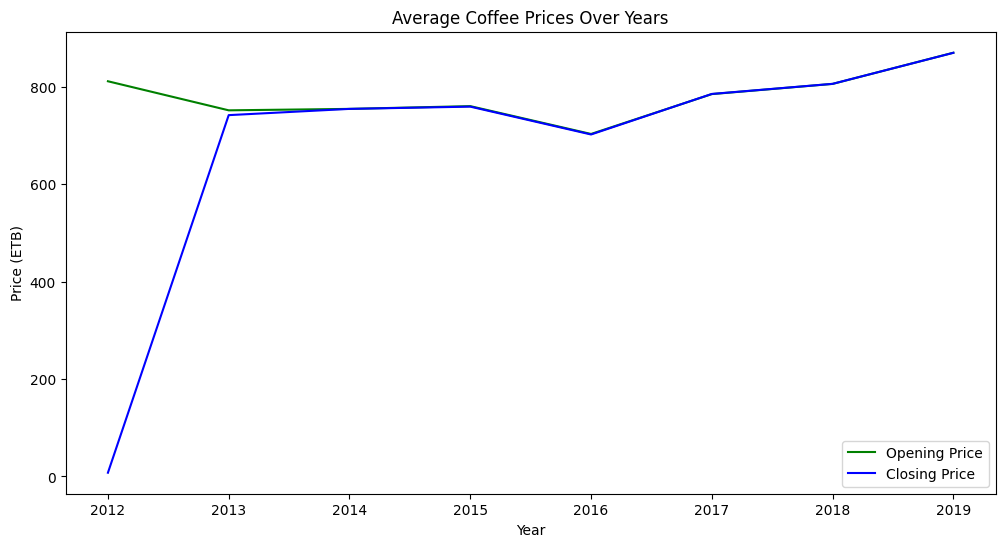

In [46]:
yearly_price_trade.plot(kind='line', figsize=(12, 6), title='Average Coffee Prices Over Years', color=['green', 'blue'])
plt.xlabel('Year')
plt.ylabel('Price (ETB)')
plt.show()

##### by Quarter

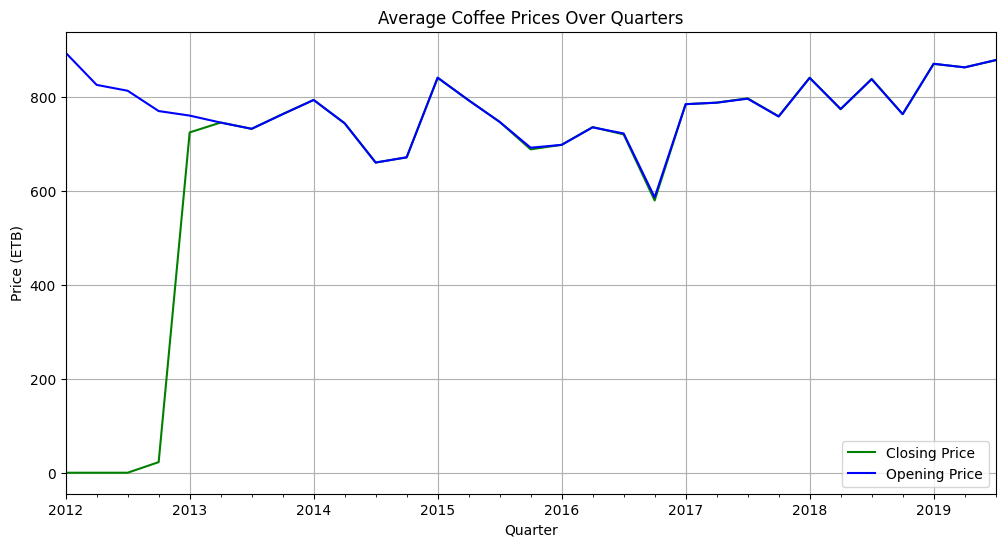

In [48]:
quater_price_trade = ecx[['Closing Price', 'Opening Price']].groupby(ecx['Trade Date'].dt.to_period('Q')).mean()
quater_price_trade.plot(kind='line', figsize=(12, 6), title='Average Coffee Prices Over Quarters', color=['green', 'blue'])
plt.ylabel('Price (ETB)')
plt.xlabel('Quarter')   
plt.grid()    
plt.show()

In [ ]:
ee = pd.read_excel(r'Coffee-2012.xlsx')
ee.head()

In [ ]:
#ee['Closing Price'] = pd.to_numeric(ee['Closing Price'], errors='coerce')
#ee['Opening Price'] = pd.to_numeric(ee['Opening Price'], errors='coerce')
#ee['High'] = pd.to_numeric(ee['High'], errors='coerce')
ee['Low'] = pd.to_numeric(ee['Low'], errors='coerce')


In [ ]:
re = ee.copy()
re.count().unique().sum()

In [ ]:
re.count().duplicated

In [ ]:
re.info()

In [ ]:
ee.dropna(inplace=True)

In [ ]:
ee.info()